#**REGRESSION TASK**


---








##Purpose of the program: 
The main purpose of this program is to analyse the Rentalbike.csv dataset which contains data about various factors regarding quantity of rental bikes.
<br><b>The total number of columns in the dataset = 16<br>The total number of rows in the dataset = 731 

##Libraries and functions necessary for the analysis

In [ ]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from google.colab import files
from sklearn.feature_selection import mutual_info_classif

##Uploading the dataset

In [ ]:
uploaded = files.upload()

Saving rentalbike.csv to rentalbike.csv


In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['rentalbike.csv']))
data_df = data
data_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Here, after storing the uploaded data in a variable, the stored table is dislayed.

In [ ]:
data_df.shape

(731, 16)

Through this, we can learn that there are a total of 16 attributes(columns) in and 731 rows in the dataset.

In [ ]:
data_df.drop(['registered','casual','dteday','instant'], axis=1, inplace=True)
data_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


The purpose of this program is count the total number of bikes that are rented on daily basis. So, since cnt is basically the sum of <b>casual rented bikes and registered rented bikes</b> these two columns are useless.And since the data are already arranged on day to day basis, the <b>dteday column</b> is also useless column. And finally, <b>instant</b> column is only represents the row it is also useless column. Hence, these four columns are removed.

##Checking if null values exist

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    int64  
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    int64  
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  cnt         731 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.7 KB


Through this, we can learn that null value does not exist in any of the columns in the dataset.

##Checking for any duplicated values

In [ ]:
data_df.duplicated().sum()

0

Here since the sum of duplicated value is 0, we can conclude that there none of the values are duplicated in the dataset

##Checking for correlation

In [ ]:
data_df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.406100
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.566710
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.279977
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,-0.068348
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.067443
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,0.061156
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.297391
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.627494
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.631066
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.100659


From the above table we can see the correlations between the various columns.

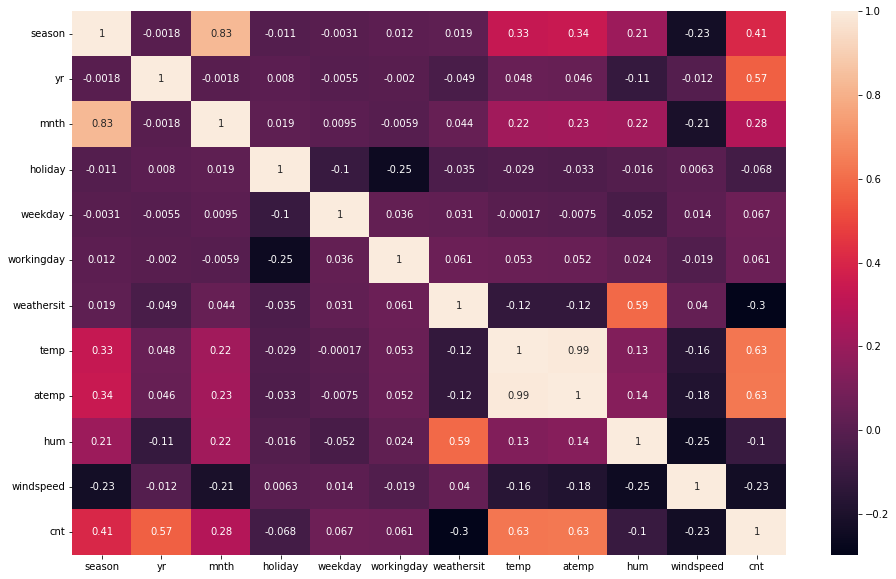

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(data_df.corr(),annot=True)

In the heatmap, the color of box of columns having high positive becomes light while vise versa for negative correlation. So, we can observe that among all the columns <b>atemp,temo,yr</b> are columns which have high positive correlation with cnt while <b>weathersit,windspeed</b> are columns with very high negative correlation.

In [ ]:
data_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


##Analyzing dataset

In [ ]:
def percents(g):
  sizes=[]
  for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=10) 
  g.set_ylim(0, max(sizes) * 1.1) 
  return

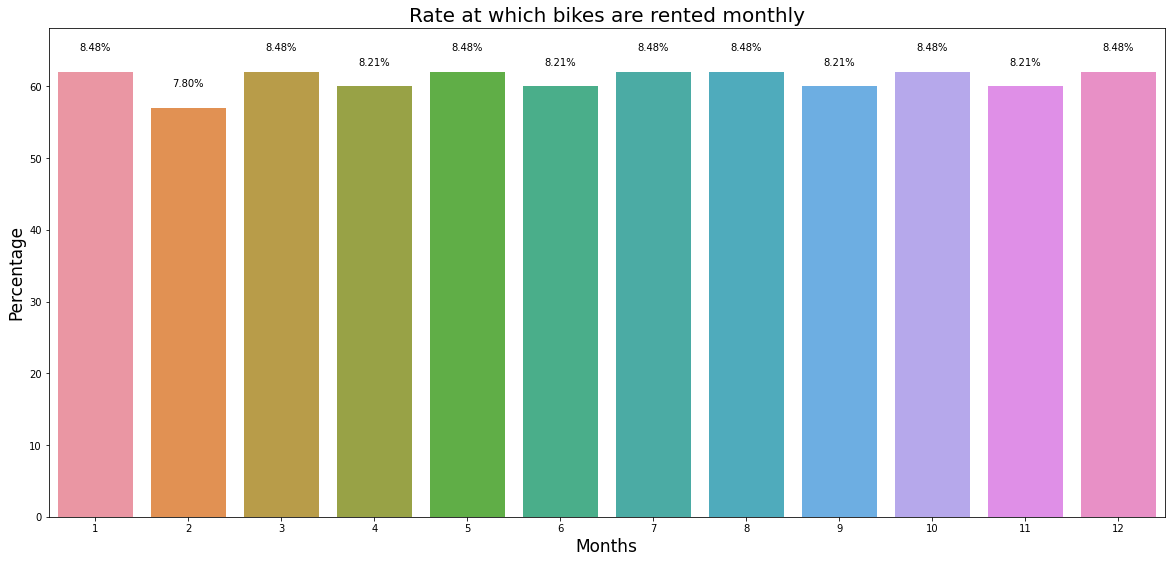

In [ ]:
total = len(data_df)
ax1 = plt.figure(figsize=(20,9))
g = sns.countplot(x='mnth', data=data_df )
g.set_title("Rate at which bikes are rented monthly", fontsize=20)
g.set_xlabel("Months", fontsize=17)
g.set_ylabel("Percentage", fontsize=17)
percents(g)

From thiis diagram, we can clearly observe that the percentage of the renting of bikes remains almost the same throughout the year. Through this we can learn that the majority of the people renting are regulars,if not the percatages would have differed vastly

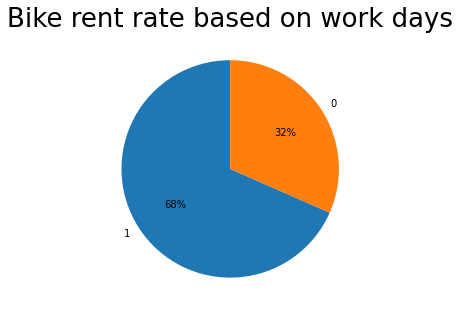

In [ ]:
df_g=data_df['workingday'].value_counts()
labels=df_g.index
fig,ax1=plt.subplots(1,1,figsize=(5,5))
ax1.pie(df_g,labels=labels, autopct='%1.0f%%', startangle=90)
plt.title("Bike rent rate based on work days",fontsize=26,color="black")
plt.show()

From the pie chart, we can learn the fact that people  tend to rent bikes mainly during workday than holiday. From this, we can conclude that majority of the people renting bikes, rents bike to go to their workplace

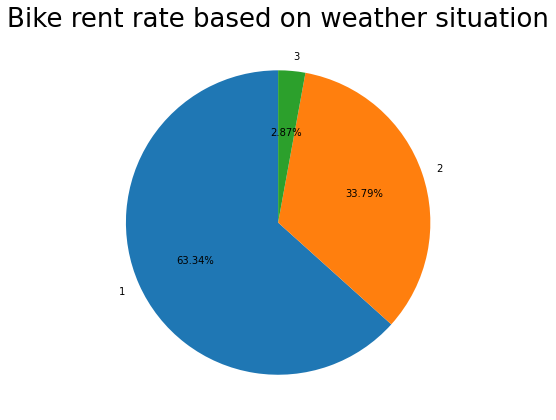

In [ ]:
df_g=data_df['weathersit'].value_counts()
labels=df_g.index
fig,ax1=plt.subplots(1,1,figsize=(11,7))
ax1.pie(df_g,labels=labels, autopct='%1.2f%%', startangle=90)
plt.title("Bike rent rate based on weather situation",fontsize=26,color="black")
plt.show()

Here, 1 represents Clear, Few clouds, Partly cloudy, Partly cloudy weather, 2 represents Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist weather and 3 represents Light Snow, Light Rain + Thunderstor + Scattered clouds, Light Rain + Scattered clouds weather.And so through the piechart we can clearly see that people prefer to rent bike during weather 1 and they rarely prefer to rent bikes during weather 3. And so, a good weather is necessary for the increase in bike rent rates.

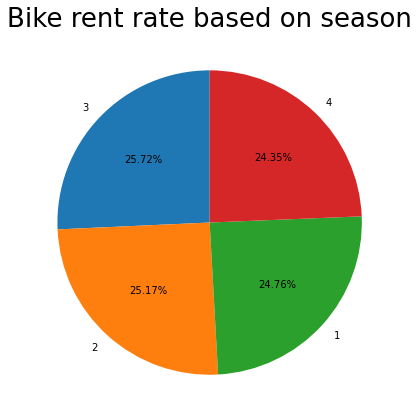

In [ ]:
df_g=data_df['season'].value_counts()
labels=df_g.index
fig,ax1=plt.subplots(1,1,figsize=(11,7))
ax1.pie(df_g,labels=labels, autopct='%1.2f%%', startangle=90)
plt.title("Bike rent rate based on season",fontsize=26,color="black")
plt.show()

In the above piechart, 1,2,3 and 4 represents winter, spring,summer and fall respectively. And we can see that the rate of bike rents are barely affected by season change because throughout the 4 seasons the rate of bike rents are same.

###Numerical datas 

In [ ]:
def scatters(title,colors,i,label):
  plt.subplot(2,2,i)
  plt.scatter( x=data_df[title], y=data_df['cnt'], c=colors)
  plt.xlabel(label)
  plt.grid(False)

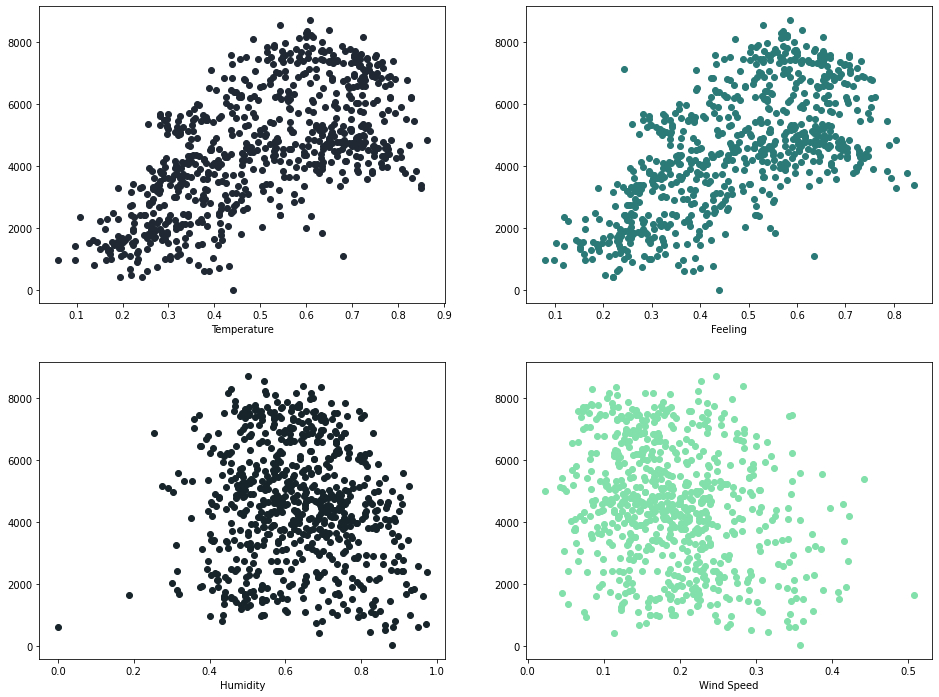

In [ ]:
plt.figure(figsize=[16,12])
scatters('temp','#1f2833',1,'Temperature')
scatters('atemp','#2b7a78',2,'Feeling')
scatters('hum','#17252a',3,'Humidity')
scatters('windspeed','#82E0AA',4,'Wind Speed')
plt.show()

From the set of above diagrams, we can learn the increase in temperature also causes increase the rate of rent bikes while the increases in windspeed causes decrease in rate of bike rents.

In [ ]:
data_df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,8714.000000


From above we can find learn a lot about the dataset like their mean,standard deviation, minimum value, maximum value, and so on

##Preprocessing and modeling

In [ ]:
x = data_df.drop("cnt", axis=1)
y = data_df["cnt"]

print(x.head())
print(y.head())

   season  yr  mnth  holiday  ...      temp     atemp       hum  windspeed
0       1   0     1        0  ...  0.344167  0.363625  0.805833   0.160446
1       1   0     1        0  ...  0.363478  0.353739  0.696087   0.248539
2       1   0     1        0  ...  0.196364  0.189405  0.437273   0.248309
3       1   0     1        0  ...  0.200000  0.212122  0.590435   0.160296
4       1   0     1        0  ...  0.226957  0.229270  0.436957   0.186900

[5 rows x 11 columns]
0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64


Seperating the dependent and independent columns

###Training and testing datas

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [ ]:
ml = LinearRegression()
ml.fit(x_train.values,y_train.values)

LinearRegression()

In [ ]:
y_pred = ml.predict(x_test.values)
print(y_pred)

[5093.27095789 5410.21453557 1743.15192362 1304.77394938 4168.09900464
 2993.99296456 3579.01766002 6104.52590452 5547.73030782 1351.64441432
 1481.6214793  1248.56599765 1539.92148543 4609.15403974 5409.55001756
 3617.79789336 6167.98738237 6253.12492402 3605.51095728 2244.60397159
 7418.7052692  3145.6752527  5205.14592156 4260.48157299 2422.68156297
 6135.92947381 6335.13113344 5131.97051062 6408.24020986 6203.7425485
  695.3880133  4939.58290316 5365.19421266 5278.53861093 2019.94313054
 4413.0921142  7259.07837789 8231.22377647 2777.49441683 3172.6815667
 5727.56120277 1541.69015024 5043.9289746  4072.14007306 7137.10010992
 6647.44831929 3211.47987305 3512.04229435 3593.67852825 1784.1947589
 6037.73664318 7171.56156395 4924.51756433 5893.78526623 4478.34121204
 3801.05257345 3166.15399112 6318.41574095 7111.44283354 4337.31194193
 5912.87358336 4614.51667164 5131.21556886 6578.36832302 6265.71081458
 3367.92621955 4832.98209302 4696.2627369  6510.07203252 5141.33501348
 5360.437

In [ ]:
print("The r2 score=",r2_score(y_test,y_pred))

The r2 score= 0.8108909842015215


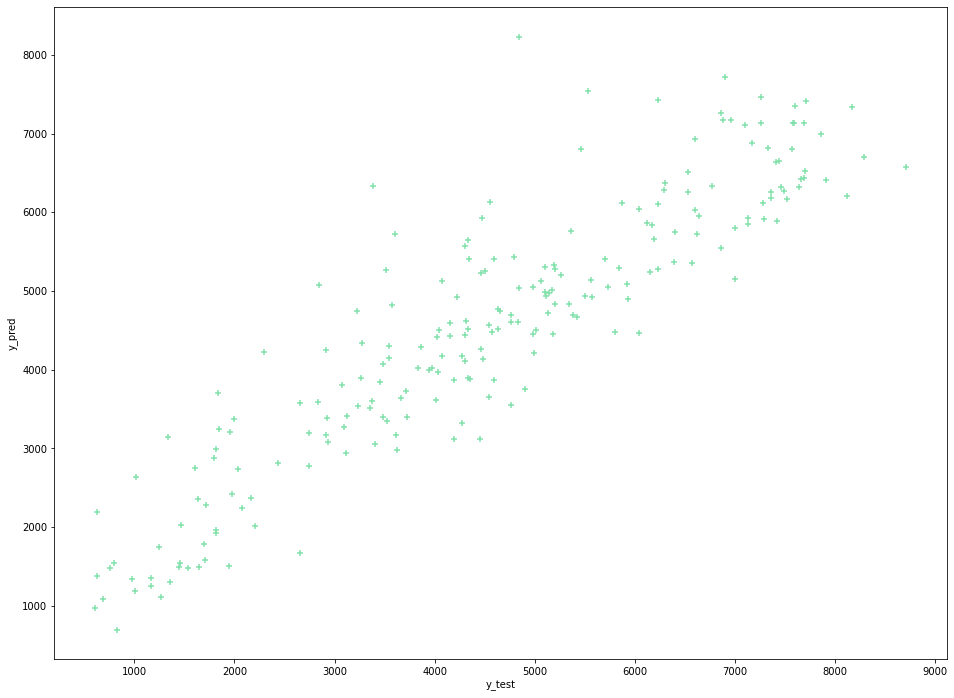

In [ ]:
plt.figure(figsize=[16,12])
plt.scatter( x=y_test, y=y_pred, c="#82E0AA",marker='+')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.grid(False)
plt.show()